In [1]:
# Install necessary libraries
!pip install transformers datasets

# Importing required libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import load_dataset, load_metric
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requir

In [2]:
# Load the IMDb dataset
dataset = load_dataset('imdb')

# Display a sample from the dataset
print(dataset['train'][0])

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Show a sample of tokenized dataset
print(tokenized_datasets['train'][0])



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [4]:
# Reduce the dataset size for quicker testing
small_train_dataset = tokenized_datasets['train'].shuffle(seed=42).select([i for i in list(range(1000))])
small_eval_dataset = tokenized_datasets['test'].shuffle(seed=42).select([i for i in list(range(500))])

# Update the training arguments for a quick test
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,              # Reduced number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=100,                # Reduced number of warmup steps
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",
)

# Re-initialize the Trainer with the smaller datasets
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,   # Smaller training dataset
    eval_dataset=small_eval_dataset,     # Smaller evaluation dataset
    tokenizer=tokenizer,
)

# Start training
trainer.train(resume_from_checkpoint=False)


Epoch,Training Loss,Validation Loss
1,0.240000,0.330838


TrainOutput(global_step=125, training_loss=0.462132043838501, metrics={'train_runtime': 27.8266, 'train_samples_per_second': 35.937, 'train_steps_per_second': 4.492, 'total_flos': 263111055360000.0, 'train_loss': 0.462132043838501, 'epoch': 1.0})

In [5]:
# Evaluate the model
eval_results = trainer.evaluate()

# Print evaluation results
print(f"Evaluation results: {eval_results}")


Evaluation results: {'eval_loss': 0.3308379352092743, 'eval_runtime': 3.7377, 'eval_samples_per_second': 133.772, 'eval_steps_per_second': 16.855, 'epoch': 1.0}


In [7]:
from torch.utils.data import Dataset

# Create a simple custom dataset for our sample texts
class SimpleDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Tokenize the sample texts
tokenized_inputs = tokenizer(sample_texts, padding='max_length', truncation=True, return_tensors="pt")

# Create the dataset
test_dataset = SimpleDataset(tokenized_inputs)

# Make predictions
predictions = trainer.predict(test_dataset)

# Convert predictions to class labels (0 or 1)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Map class labels to sentiment
sentiment_labels = ["Negative", "Positive"]
predicted_sentiments = [sentiment_labels[label] for label in predicted_labels]

# Print the results
for text, sentiment in zip(sample_texts, predicted_sentiments):
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")


<ipython-input-7-508c4369755c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Text: This movie was absolutely wonderful!
Predicted Sentiment: Positive

Text: I did not enjoy the film, it was too slow and boring.
Predicted Sentiment: Negative

Text: The film had a great start, but it became dull towards the end.
Predicted Sentiment: Negative

Text: One of the worst movies I've seen in a long time.
Predicted Sentiment: Negative

Text: An amazing experience, I loved every part of it!
Predicted Sentiment: Positive



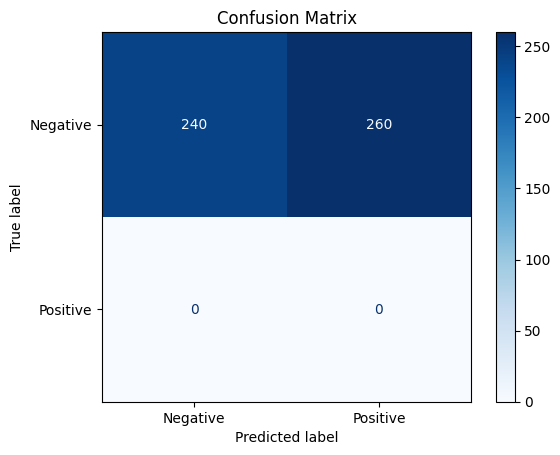

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the true labels from the evaluation dataset
true_labels = np.array(tokenized_datasets['test']['label'])[:500]

# Generate predictions for the entire evaluation dataset
eval_predictions = trainer.predict(small_eval_dataset)
predicted_labels_eval = np.argmax(eval_predictions.predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels_eval)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sentiment_labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


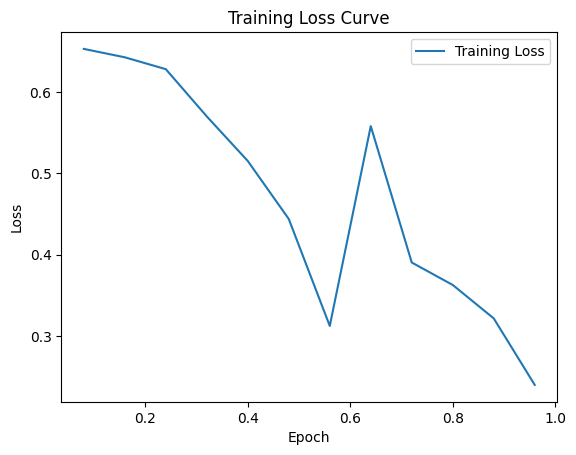

In [9]:
# Extract training loss from the training logs
loss_values = trainer.state.log_history

# Extract epochs and corresponding loss values
epochs = [log['epoch'] for log in loss_values if 'loss' in log]
loss = [log['loss'] for log in loss_values if 'loss' in log]

# Plot the loss curve
plt.plot(epochs, loss, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()
